### Install Libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import yfinance as yf
import warnings
import matplotlib
import statsmodels.api as sm

### Layout Graphs Configuration

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

### Download Data - Petrobras

Our data are based on the shares of the company Petróleo Brasileiro S.A. — Petrobras (PETR4.SA).

In [3]:
series_petr4 = yf.download("PETR4.SA", start="2015-01-01", end="2020-10-02")

[*********************100%***********************]  1 of 1 completed


In [4]:
series_petr4.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.99,9.99,9.35,9.36,8.683293,49559500
2015-01-05,9.14,9.19,8.53,8.56,7.941135,78385100
2015-01-06,8.71,8.83,8.04,8.28,7.681378,84723300
2015-01-07,8.56,8.73,8.36,8.67,8.043181,85531000
2015-01-08,8.79,9.39,8.74,9.23,8.562695,83306300


#### Time Series Visualization
#### OPEN

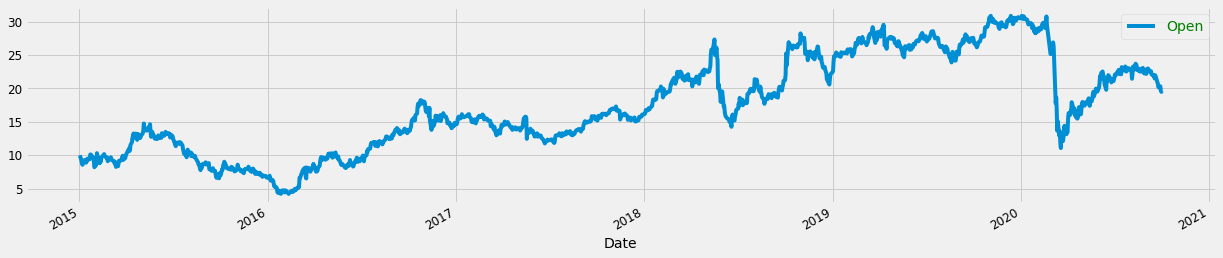

In [5]:
series_petr4[["Open"]].plot(figsize = (19, 4)) 
plt.show()

### Time Series Decomposition - Additive Model

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
series_petr4_open = series_petr4.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [7]:
series_petr4_open.head(2)

,Open
Date,
2015-01-02,9.99
2015-01-05,9.14


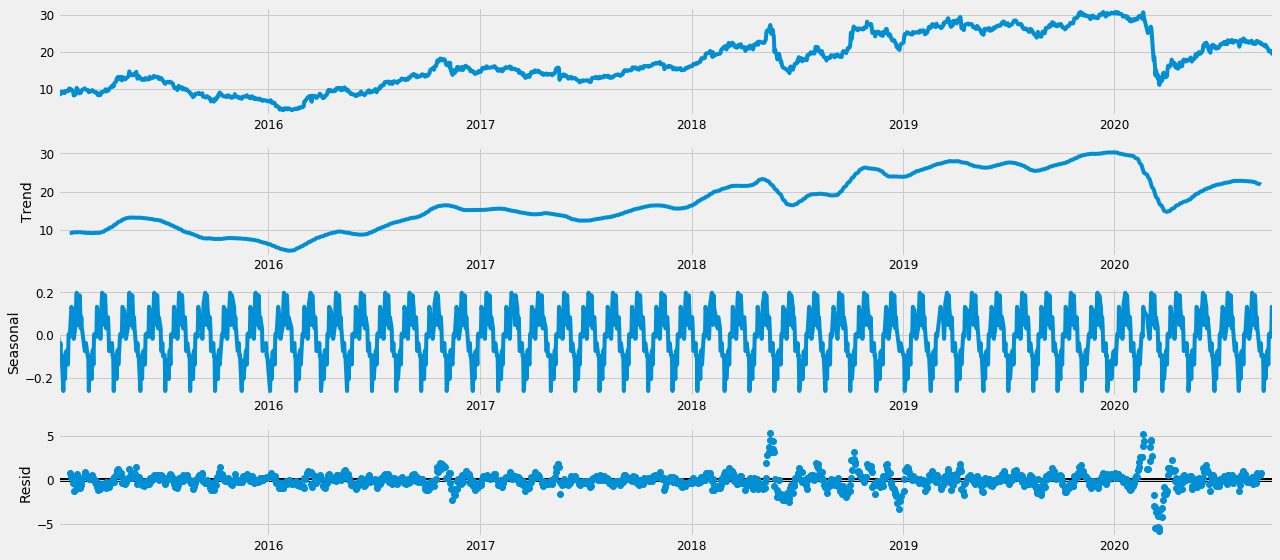

In [8]:
decomposition = sm.tsa.seasonal_decompose(x=series_petr4_open, freq=30, model='additive')
fig = decomposition.plot()
plt.show()

### Time Series Decomposition - Multiplicative Model

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
series_petr4_close = series_petr4.drop(['High', 'Low', 'Open', 'Adj Close', 'Volume'], axis=1)

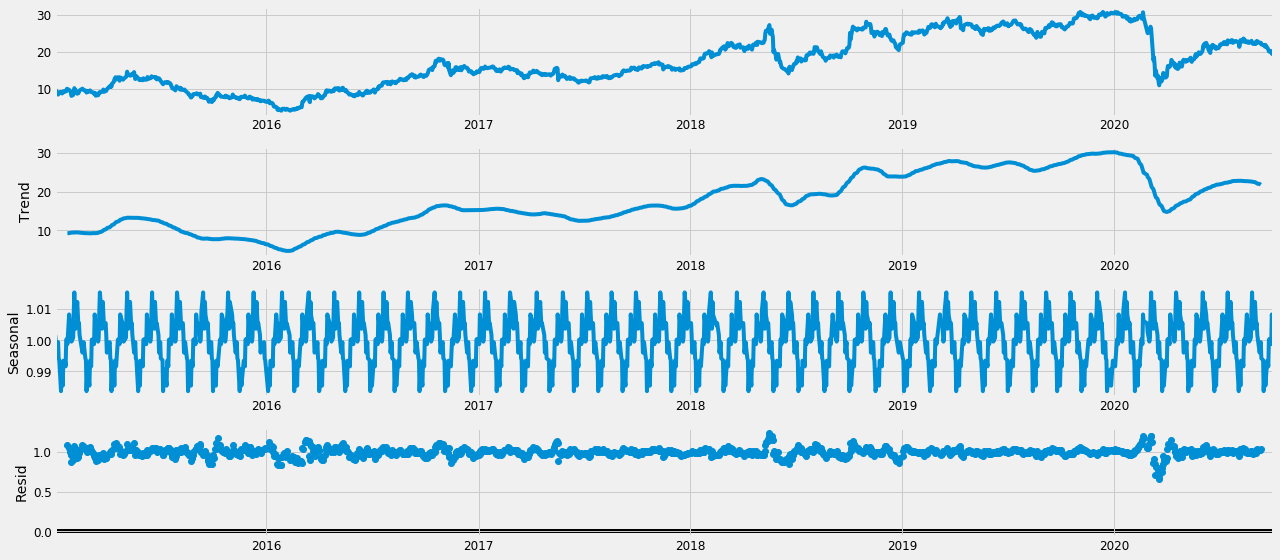

In [10]:
decomposition = sm.tsa.seasonal_decompose(x=series_petr4_open, freq=30, model='multiplicative')
fig = decomposition.plot()
plt.show()